## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import datasets
from sklearn.metrics import accuracy_score

## Load Dataset

In [ ]:
# Prepare the data data

data = sns.load_dataset('titanic')
data = data.dropna().reset_index(drop=True)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [ ]:
data = data[['survived','pclass','age','sibsp','parch','fare']]
data.head()

,survived,pclass,age,sibsp,parch,fare
0,1,1,38.0,1,0,71.2833
1,1,1,35.0,1,0,53.1000
2,0,1,54.0,0,0,51.8625
3,1,3,4.0,1,1,16.7000
4,1,1,58.0,0,0,26.5500


## Data Preprocessing

In [ ]:
X = data.drop('survived', axis=1)
y = data.survived

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

## Modeling with KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

list_acc = []
for i in range(1,20):
    print()

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)
    list_acc.append(accuracy_score(y_test, y_pred_knn))

In [ ]:
list_acc

[0.5636363636363636,
 0.4909090909090909,
 0.5818181818181818,
 0.5818181818181818,
 0.6363636363636364,
 0.6363636363636364,
 0.6,
 0.6545454545454545,
 0.6181818181818182,
 0.5818181818181818,
 0.6181818181818182,
 0.6363636363636364,
 0.6727272727272727,
 0.7090909090909091,
 0.6181818181818182,
 0.6,
 0.6,
 0.6545454545454545,
 0.6]

<AxesSubplot:>

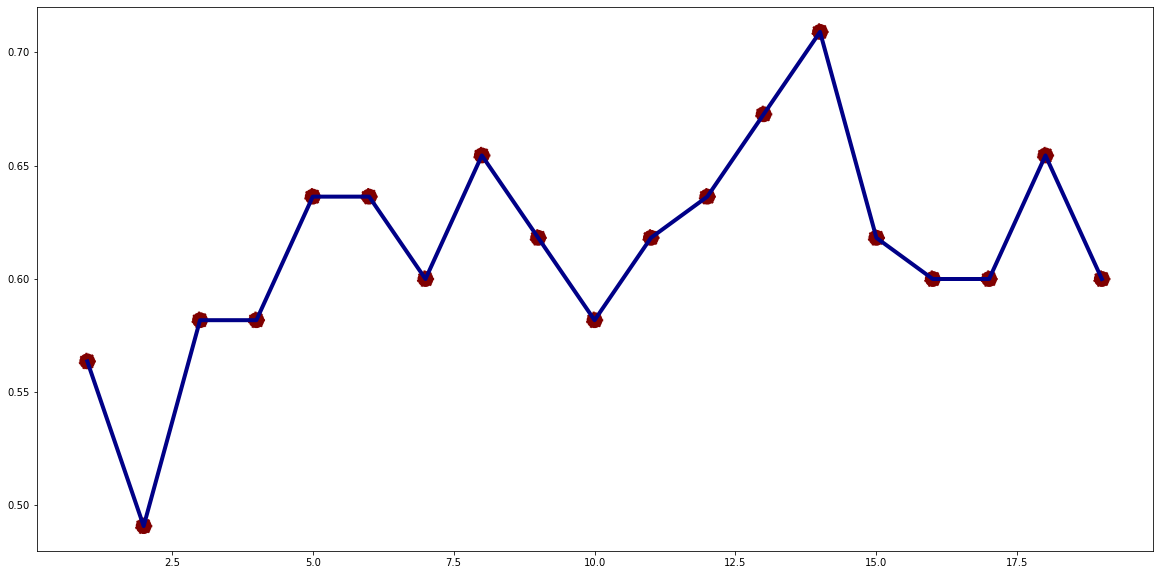

In [ ]:
plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 20), y=list_acc, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 20), y=list_acc, s=300, color='#800000',  linestyle='--')